In [3]:
# %load C:\Users\walter\Desktop\tools\plot_template.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='serif')
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14, color='grey')
plt.rc('ytick', labelsize=14, color='grey')
plt.rc('legend', fontsize=16, loc='lower left')
plt.rc('figure', titlesize=18)
plt.rc('savefig', dpi=330, bbox='tight')
%matplotlib inline

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from utils import regress_dist, read_ami, read_comStock, generate_samples_ComStock

start_time_WD_CS, duration_WD_CS, start_time_NWD_CS, duration_NWD_CS, buildingType_CS = read_comStock()

In [6]:
duration_WD_CS

,Dependency=building_type,Dependency=start_time,Option=5.75,Option=6.0,Option=6.25,Option=6.5,Option=6.75,Option=7.0,Option=7.25,Option=7.5,...,Option=16.5,Option=16.75,Option=17.0,Option=17.25,Option=17.5,Option=17.75,Option=18.0,Option=18.25,Option=18.5,Option=18.75
0,primary_school,5.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,primary_school,5.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,primary_school,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,primary_school,6.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,primary_school,6.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,warehouse,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,warehouse,8.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,warehouse,8.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,warehouse,8.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fig_name=None
xmin=0
xmax=12
ymin=0
ymax=20

## Example 1: without ComStock

In [8]:
ami = read_ami('example1.csv')
ami.head()

,High Load Start,High Load Duration,building_ID,utility,building_type,date,holiday
0,NaN,NaN,UID6426,seattle,parking_garage,2019-01-01,True
1,19.0,1.0,UID6426,seattle,parking_garage,2019-01-02,False
2,17.0,4.0,UID6426,seattle,parking_garage,2019-01-03,False
3,18.0,1.0,UID6426,seattle,parking_garage,2019-01-04,False
4,8.0,11.0,UID6426,seattle,parking_garage,2019-01-05,False


In [9]:
utilities = ami['utility'].unique()
building_type = ami['building_type'].unique()

assert building_type.shape[0] == 1
building_type = building_type[0]
building_type

'parking_garage'

In [10]:
col_n = 2
CS_building = building_type in buildingType_CS
row_n = utilities.shape[0] + CS_building

In [11]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

C:\Users\walter\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


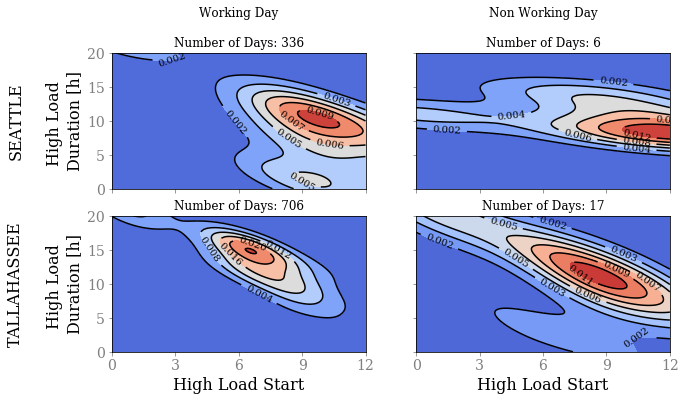

In [12]:
fig, axs = plt.subplots(row_n, col_n, sharex=True, sharey=True, figsize=(10, row_n*2.5+0.5))

for row_i, utility in enumerate(utilities):
    utility_data = ami[ami['utility']==utility]
    utility_data.dropna(inplace=True)
    
    # column 1 - Working day
    data_plot = utility_data[utility_data['holiday']==False]
    numberOfDays = data_plot.shape[0]
    f_raw_WD = regress_dist(data_plot, positions, xx)
    cfset = axs[row_i, 0].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_i, 0].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_i, 0].clabel(cset, inline=1, fontsize=10)    
    axs[row_i, 0].set_ylabel(f'{utility.upper()}\n\nHigh Load \nDuration [h]')
    if row_i == 0:
        axs[row_i, 0].set_title(f"Working Day\n\nNumber of Days: {numberOfDays}")
    else:
        axs[row_i, 0].set_title(f"Number of Days: {numberOfDays}")
    
    # column 2 - Non-Working day
    data_plot = utility_data[utility_data['holiday']==True]
    numberOfDays = data_plot.shape[0]
    f_raw_WD = regress_dist(data_plot, positions, xx)
    cfset = axs[row_i, 1].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_i, 1].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_i, 1].clabel(cset, inline=1, fontsize=10)   
    if row_i == 0:
        axs[row_i, 1].set_title(f"Non Working Day\n\nNumber of Days: {numberOfDays}")
    else:
        axs[row_i, 1].set_title(f"Number of Days: {numberOfDays}")

for i in range(2):
    axs[row_n-1, i].set_xlabel('High Load Start')
    axs[row_n-1, i].set_xticks(range(0, 13, 3))
plt.savefig(f'fig/utility/{building_type}.png')

## example 2: with ComStock

In [13]:
ami = read_ami('example2.csv')

In [14]:
utilities = ami['utility'].unique()
building_type = ami['building_type'].unique()

assert building_type.shape[0] == 1
building_type = building_type[0]
building_type

'hospital'

In [15]:
col_n = 2
CS_building = building_type in buildingType_CS
row_n = utilities.shape[0] + CS_building

In [16]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

C:\Users\walter\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


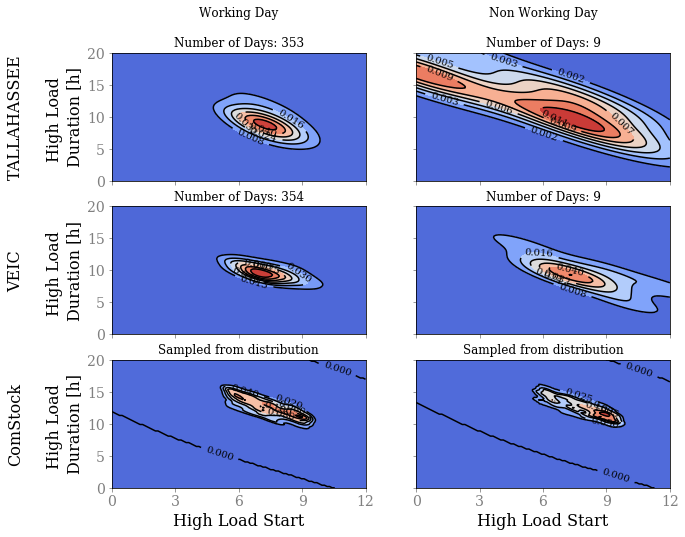

In [17]:
fig, axs = plt.subplots(row_n, col_n, sharex=True, sharey=True, figsize=(10, row_n*2.5+0.5))

# AMI data
for row_i, utility in enumerate(utilities):
    utility_data = ami[ami['utility']==utility]
    utility_data.dropna(inplace=True)
    
    # column 1 - Working day
    data_plot = utility_data[utility_data['holiday']==False]
    numberOfDays = data_plot.shape[0]
    f_raw_WD = regress_dist(data_plot, positions, xx)
    cfset = axs[row_i, 0].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_i, 0].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_i, 0].clabel(cset, inline=1, fontsize=10)    
    axs[row_i, 0].set_ylabel(f'{utility.upper()}\n\nHigh Load \nDuration [h]')
    if row_i == 0:
        axs[row_i, 0].set_title(f"Working Day\n\nNumber of Days: {numberOfDays}")
    else:
        axs[row_i, 0].set_title(f"Number of Days: {numberOfDays}")
    
    # column 2 - Non-Working day
    data_plot = utility_data[utility_data['holiday']==True]
    numberOfDays = data_plot.shape[0]
    f_raw_WD = regress_dist(data_plot, positions, xx)
    cfset = axs[row_i, 1].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_i, 1].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_i, 1].clabel(cset, inline=1, fontsize=10)   
    if row_i == 0:
        axs[row_i, 1].set_title(f"Non Working Day\n\nNumber of Days: {numberOfDays}")
    else:
        axs[row_i, 1].set_title(f"Number of Days: {numberOfDays}")

if CS_building:
    samples_WD_ComStock = generate_samples_ComStock(start_time_WD_CS, duration_WD_CS, building_type)
    samples_NWD_ComStock = generate_samples_ComStock(start_time_NWD_CS, duration_NWD_CS, building_type)
    # column 1 - Working day
    f_raw_WD = regress_dist(samples_WD_ComStock, positions, xx)
    cfset = axs[row_n-1, 0].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_n-1, 0].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_n-1, 0].clabel(cset, inline=1, fontsize=10)    
    axs[row_n-1, 0].set_ylabel('ComStock\n\nHigh Load \nDuration [h]')
    axs[row_n-1, 0].set_title("Sampled from distribution")
    
    # column 2 - Non-Working day
    f_raw_WD = regress_dist(samples_NWD_ComStock, positions, xx)
    cfset = axs[row_n-1, 1].contourf(xx, yy, f_raw_WD, cmap='coolwarm')
    cset = axs[row_n-1, 1].contour(xx, yy, f_raw_WD, colors='k')
    axs[row_n-1, 1].clabel(cset, inline=1, fontsize=10)   
    axs[row_n-1, 1].set_title("Sampled from distribution")    
        
for i in range(2):
    axs[row_n-1, i].set_xlabel('High Load Start')
    axs[row_n-1, i].set_xticks(range(0, 13, 3))